In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk

In [4]:
#Importing lemmatizer, string, RE and stopwords needed for data cleaning
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download("wordnet")
lm = WordNetLemmatizer()
import string

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
#Data
news = pd.read_csv("train.csv")

In [6]:
news.head(3)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1


In [7]:
news.shape

(20800, 5)

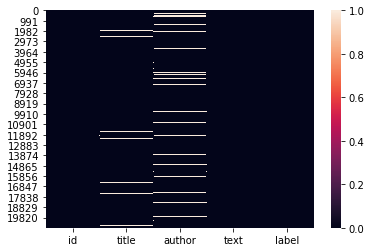

In [8]:
sns.heatmap(news.isnull())

In [9]:
#Getting rid of the null values
news = news.dropna()

In [10]:
news.head(2)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0


In [11]:
news.shape

(18285, 5)

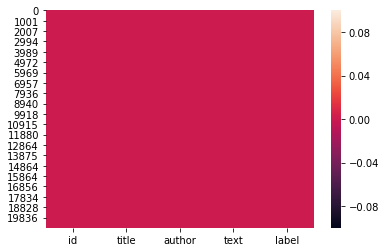

In [12]:
sns.heatmap(news.isnull())

In [13]:
X = news.drop("label",axis=1)
y= news["label"]

In [14]:
X.shape

(18285, 4)

In [15]:
y.shape

(18285,)

In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense


In [17]:
#We need a vocabolury size to do one hot representation
voc_size = 6000

In [18]:
#We'll reset the index to adjust with the changed values
X.reset_index(inplace=True)

In [19]:
X.head(15)

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi..."
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi..."
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that..."
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...


In [20]:
#Data Cleaning
corpus =[]

for i in range(0,len(X)):

    temp = re.sub('[^a-zA-Z]'," ", X["title"][i])
    temp = temp.lower()
    temp = temp.split()
    temp = [lm.lemmatize(word) for word in temp if not word in stopwords.words("English")]
    temp = " ".join(temp)

    corpus.append(temp)


In [21]:
corpus

['house dem aide even see comey letter jason chaffetz tweeted',
 'flynn hillary clinton big woman campus breitbart',
 'truth might get fired',
 'civilian killed single u airstrike identified',
 'iranian woman jailed fictional unpublished story woman stoned death adultery',
 'jackie mason hollywood would love trump bombed north korea lack trans bathroom exclusive video breitbart',
 'beno hamon win french socialist party presidential nomination new york time',
 'back channel plan ukraine russia courtesy trump associate new york time',
 'obama organizing action partner soros linked indivisible disrupt trump agenda',
 'bbc comedy sketch real housewife isi cause outrage',
 'russian researcher discover secret nazi military base treasure hunter arctic photo',
 'u official see link trump russia',
 'yes paid government troll social medium blog forum website',
 'major league soccer argentine find home success new york time',
 'well fargo chief abruptly step new york time',
 'anonymous donor pay 

In [22]:

corpus

['house dem aide even see comey letter jason chaffetz tweeted',
 'flynn hillary clinton big woman campus breitbart',
 'truth might get fired',
 'civilian killed single u airstrike identified',
 'iranian woman jailed fictional unpublished story woman stoned death adultery',
 'jackie mason hollywood would love trump bombed north korea lack trans bathroom exclusive video breitbart',
 'beno hamon win french socialist party presidential nomination new york time',
 'back channel plan ukraine russia courtesy trump associate new york time',
 'obama organizing action partner soros linked indivisible disrupt trump agenda',
 'bbc comedy sketch real housewife isi cause outrage',
 'russian researcher discover secret nazi military base treasure hunter arctic photo',
 'u official see link trump russia',
 'yes paid government troll social medium blog forum website',
 'major league soccer argentine find home success new york time',
 'well fargo chief abruptly step new york time',
 'anonymous donor pay 

In [23]:
#One-Hot Presentation
oneHot_rep = [one_hot(words,voc_size) for words in corpus]

In [24]:
#Fixing the number of words per sentence
sentence_length = 20

In [25]:
#Padding

embedded_doc = pad_sequences(oneHot_rep,padding="pre",maxlen=sentence_length)

In [26]:
embedded_doc[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 2657, 1988,  892, 3690, 3086, 1877, 4711])

In [27]:
len(embedded_doc)

18285

In [28]:
# Fixing the dimension
dimension = 40

In [29]:
# Embedding
model = Sequential()
model.add(Embedding(voc_size,dimension,input_length=sentence_length))
model.add(LSTM(100))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [30]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            240000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 296,501
Trainable params: 296,501
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
len(embedded_doc),y.shape

(18285, (18285,))

In [32]:
X_final = np.array(embedded_doc)
y_final = np.array(y)

In [33]:
X_final.shape
y_final.shape

(18285,)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3)

In [35]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=100)

Epoch 1/5
128/128 [==============================] - 4s 31ms/step - loss: 0.3919 - accuracy: 0.8070 - val_loss: 0.2233 - val_accuracy: 0.9069
Epoch 2/5
128/128 [==============================] - 4s 32ms/step - loss: 0.1467 - accuracy: 0.9429 - val_loss: 0.1879 - val_accuracy: 0.9258
Epoch 3/5
128/128 [==============================] - 4s 30ms/step - loss: 0.0943 - accuracy: 0.9675 - val_loss: 0.1922 - val_accuracy: 0.9233
Epoch 4/5
128/128 [==============================] - 4s 29ms/step - loss: 0.0651 - accuracy: 0.9777 - val_loss: 0.2380 - val_accuracy: 0.9087
Epoch 5/5
128/128 [==============================] - 4s 35ms/step - loss: 0.0419 - accuracy: 0.9868 - val_loss: 0.2597 - val_accuracy: 0.9143


In [36]:
pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

[[2895  208]
 [ 262 2121]]


              precision    recall  f1-score   support

           0       0.92      0.93      0.92      3103
           1       0.91      0.89      0.90      2383

    accuracy                           0.91      5486
   macro avg       0.91      0.91      0.91      5486
weighted avg       0.91      0.91      0.91      5486

